In [ ]:
import os

AWS_ACCESS_KEY_ID = input("s3-upload-user ")
AWS_SECRET_ACCESS_KEY = input("vrwV3P#= ")
AWS_REGION = "us-east-1"

In [2]:
pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.2 MB/s eta 0:00:00


In [3]:
import boto3

session = boto3.Session(
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
    region_name=AWS_REGION
)

s3 = session.client("s3")

print("New session created!")

New session created!


In [4]:
import pandas as pd
# Connect to S3
s3 = session.client("s3")

# Bucket and file
bucket_name = "my-unique-dataset-bucketm"
file_key = "AB_NYC_2019.csv"

# Load CSV into pandas
obj = s3.get_object(Bucket=bucket_name, Key=file_key)
df = pd.read_csv(obj["Body"])

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

'id', 'host_name', 'host_id', 'last_review' dropped due to high cardinality/randomness and irrelevance for basic modeling

In [6]:
# 1. Drop unnecessary columns
df = df.drop(columns=["id", "host_name", "host_id", "last_review"])

•	reviews_per_month → NaN means no reviews → fill with 0

In [7]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

Some listings have unrealistic prices like 1000

In [8]:
df = df[df["price"] < 1000]
df = df[df["minimum_nights"] < 365]

traget features (# X now contains all original columns (features) except 'price', which is the target variable (y).)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

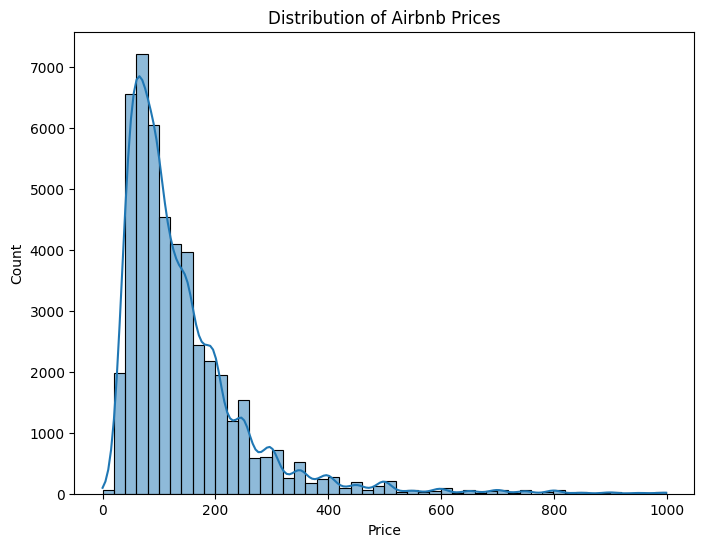

In [10]:
# 1. Price Distribution
# =============================
plt.figure(figsize=(8,6))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


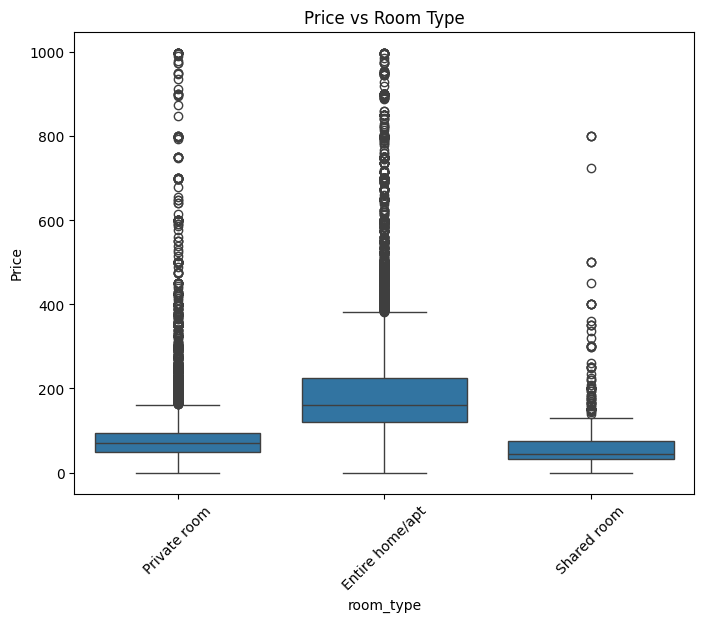

In [11]:
# 2. Price vs Room Type
# =============================
plt.figure(figsize=(8,6))
sns.boxplot(x="room_type", y="price", data=df)
plt.title("Price vs Room Type")
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.show()

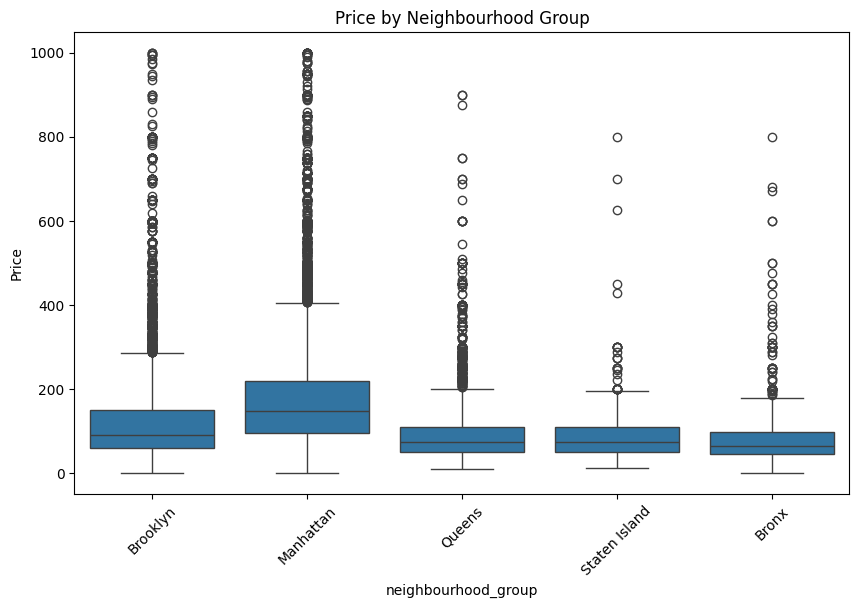

In [12]:
# 3. Price vs Neighbourhood Group
# =============================
plt.figure(figsize=(10,6))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.title("Price by Neighbourhood Group")
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.show()


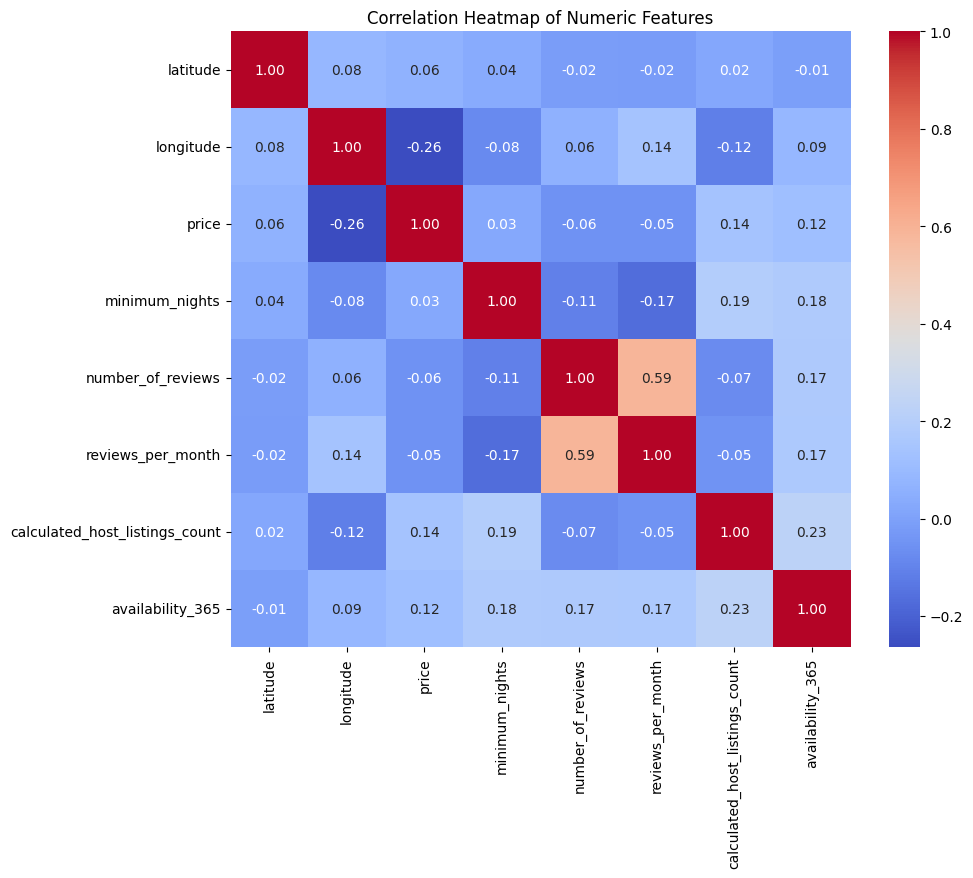

In [13]:
# 4. Correlation Heatmap (for numeric variables)
# =============================
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(exclude="object")
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

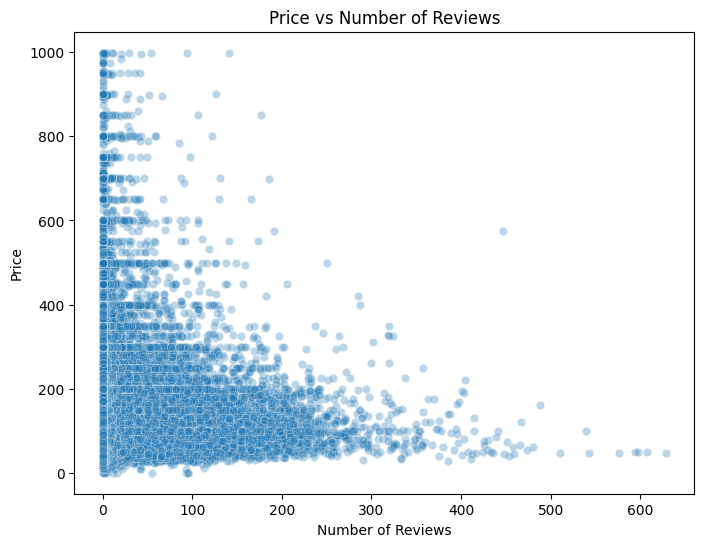

In [14]:
# 5. Scatterplot: Price vs Number of Reviews
# =============================
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="number_of_reviews", y="price", alpha=0.3)
plt.title("Price vs Number of Reviews")
plt.ylabel("Price")
plt.xlabel("Number of Reviews")
plt.show()

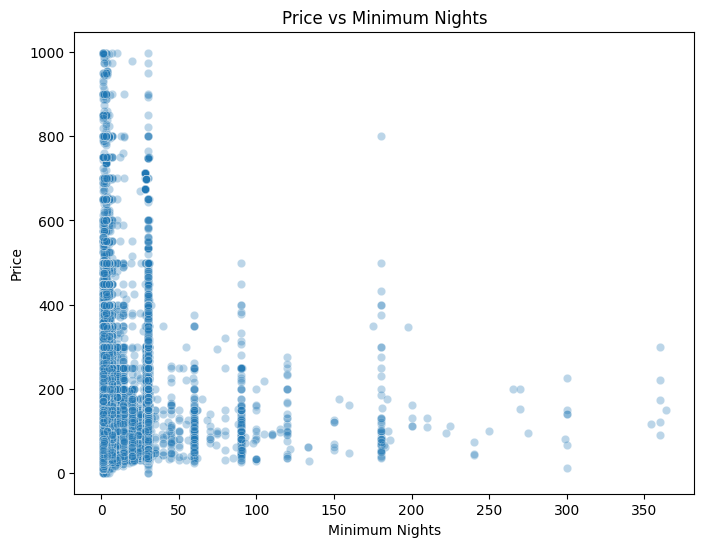

In [15]:
# =============================
# 6. Scatterplot: Price vs Minimum Nights
# =============================
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="minimum_nights", y="price", alpha=0.3)
plt.title("Price vs Minimum Nights")
plt.ylabel("Price")
plt.xlabel("Minimum Nights")
plt.show()

In [16]:
y = df["price"]
X = df.drop(columns=["price"])

 Categorical features

In [17]:
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

train-test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
12701,Best Neighborhood Brand New 1 BDRM!,Manhattan,Lower East Side,40.72082,-73.98728,Entire home/apt,1,130,2.98,1,328
31566,"Cosy,Elegant 1 Bedroom Apartment in heart of UES!",Manhattan,Upper East Side,40.77883,-73.95528,Entire home/apt,3,10,0.70,2,365
10562,Private Room close to subway (1/3),Queens,Jackson Heights,40.75526,-73.86468,Private room,1,114,2.45,3,328
23391,Completed New studio @ Luxury apartment,Queens,Long Island City,40.75027,-73.94236,Entire home/apt,1,7,0.28,1,0
33708,Modern Brooklyn Loft in Full-Service Elev Bldg,Brooklyn,Prospect Heights,40.68219,-73.97259,Entire home/apt,3,6,0.52,1,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [20]:
# ============================================
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

In [22]:
model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("xgb", XGBRegressor(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        ))
    ]
)

In [24]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name',
                                                   'neighbourhood_group',
                                                   'neighbourhood',
                                                   'room_type']),
                                                 ('num', 'passthrough',
                                                  ['latitude', 'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365'])])),
                ('xgb',
                 XGBRegressor(bas...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [25]:
preds = model.predict(X_test)

In [26]:
import numpy as np


In [27]:
# 10. Evaluation Metrics
# ============================================
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("Model Performance:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Model Performance:
MAE : 47.602272033691406
RMSE: 82.74233171135106
R²  : 0.44850367307662964


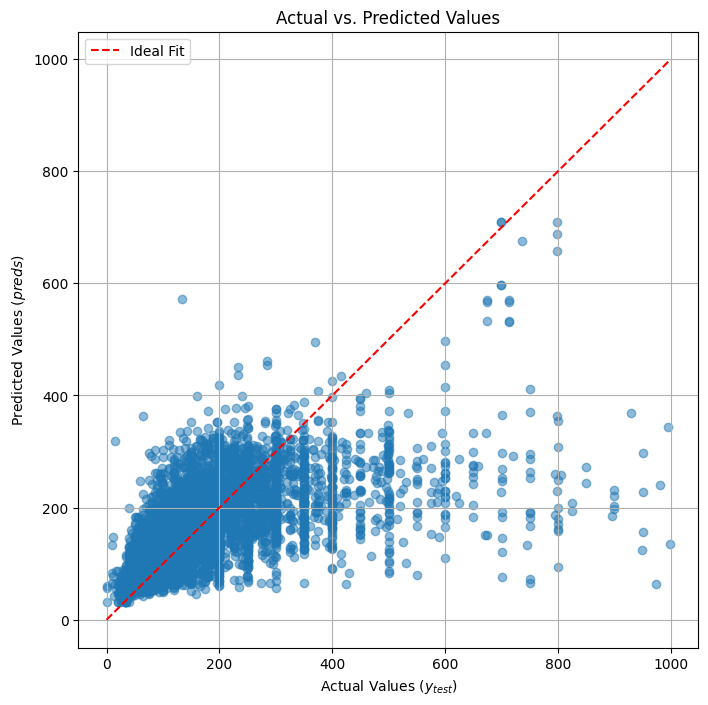

In [28]:
plt.figure(figsize=(8, 8))
# 1. Plot the predictions vs. actuals
plt.scatter(y_test, preds, alpha=0.5)

# 2. Add the ideal line (y=x) where predictions exactly match actuals
min_val = min(y_test.min(), preds.min())
max_val = max(y_test.max(), preds.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Fit')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values ($y_{test}$)')
plt.ylabel('Predicted Values ($preds$)')
plt.legend()
plt.grid(True)
plt.show()

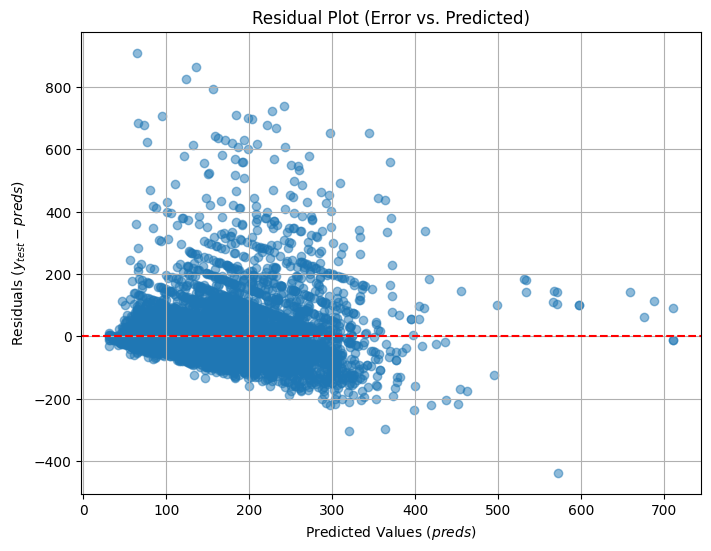

In [30]:

residuals = y_test - preds

plt.figure(figsize=(8, 6))
# Plot the residuals against the predicted values
plt.scatter(preds, residuals, alpha=0.5)

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.title('Residual Plot (Error vs. Predicted)')
plt.xlabel('Predicted Values ($preds$)')
plt.ylabel('Residuals ($y_{test} - preds$)')
plt.grid(True)
plt.show()